# **LABORATORY TASK**


Use the 20 Newsgroups dataset from Scikit-learn to
convert text data into one-hot encoding.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load the 20 Newsgroups dataset
categories = ['rec.sport.hockey', 'sci.space']  # Limit categories for simplicity
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
texts = newsgroups.data[:5]  # Take the first 5 documents for demonstration

In [ ]:
# Convert text into a binary matrix using CountVectorizer
vectorizer = CountVectorizer(binary=True)  # Set binary=True for one-hot encoding
binary_matrix = vectorizer.fit_transform(texts)

In [ ]:
# Convert to DataFrame for better visualization
feature_names = vectorizer.get_feature_names_out()
df = pd.DataFrame(binary_matrix.toarray(),
                 columns=feature_names,
                 index=[f'Document_{i+1}' for i in range(len(texts))])

In [ ]:
# Print the result
print("\nShape of the binary matrix:", binary_matrix.shape)
print("\nFirst few columns of the one-hot encoded matrix:")
print(df.iloc[:, :10])  # Show first 10 columns for brevity


Shape of the binary matrix: (5, 1209)

First few columns of the one-hot encoded matrix:
            00  01  02  03  04  05  06  07  08  09
Document_1   1   1   1   1   1   1   1   1   1   1
Document_2   0   0   0   0   0   0   0   0   0   0
Document_3   0   0   0   0   0   0   0   0   0   0
Document_4   0   0   0   0   0   0   0   0   0   0
Document_5   0   0   0   0   0   0   0   0   0   0


Use the IMDB Reviews dataset from NLTK to
compute TF-IDF for text features.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import movie_reviews
import nltk
import pandas as pd
import numpy as np

# Download and load IMDB movie reviews dataset
nltk.download('movie_reviews')
documents = [" ".join(movie_reviews.words(fileid))
            for fileid in movie_reviews.fileids()[:5]]  # Use 5 reviews for simplicity

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
# Compute TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit features for demonstration
    stop_words='english',
    norm='l2',
    use_idf=True
)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

In [ ]:
# Convert to DataFrame
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_feature_names,
    index=[f'Review_{i+1}' for i in range(len(documents))]
)

In [ ]:
# Print the TF-IDF Feature Matrix
print("\nIMDB Reviews TF-IDF Features:")
print("Shape:", tfidf_matrix.shape)
print("\nTop 10 features with highest average TF-IDF scores:")
# Get average TF-IDF scores for each feature
avg_tfidf = np.mean(tfidf_matrix.toarray(), axis=0)
top_features = pd.DataFrame({
    'Feature': tfidf_feature_names,
    'Avg_TFIDF': avg_tfidf
}).sort_values('Avg_TFIDF', ascending=False).head(10)
print(top_features)

print("\nSample of TF-IDF matrix (first 5 features for all documents):")
print(tfidf_df.iloc[:, :5])


IMDB Reviews TF-IDF Features:
Shape: (5, 838)

Top 10 features with highest average TF-IDF scores:
     Feature  Avg_TFIDF
480    movie   0.102301
283     film   0.102032
690  stalked   0.094130
0         10   0.093499
424     like   0.070284
209      don   0.059215
446     make   0.057450
578    quest   0.057435
399     just   0.055612
411     know   0.055039

Sample of TF-IDF matrix (first 5 features for all documents):
                10      1960     1990s      1997        20
Review_1  0.467494  0.000000  0.000000  0.000000  0.046749
Review_2  0.000000  0.000000  0.000000  0.000000  0.000000
Review_3  0.000000  0.122289  0.000000  0.000000  0.000000
Review_4  0.000000  0.000000  0.000000  0.057435  0.000000
Review_5  0.000000  0.000000  0.039221  0.000000  0.000000


Use the 20 Newsgroups dataset to:

*   Extract N-Grams from the text data.

*   Train Word2Vec word embeddings on the tokenized text.
*   Visualize the trained word embeddings using T-SNE plot.


Compare the results of word embeddings generated using the Skip-gram and
CBOW methods.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Download required NLTK data
nltk.download('punkt', quiet=True)

# Load the 20 Newsgroups dataset
categories = ['sci.space']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
texts = newsgroups.data[:100]  # Use the first 5 documents for simplicity

In [ ]:
# Step 1: Extract N-Grams
# Create vectorizers for different n-gram ranges
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=100)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=100)

In [ ]:
# Fit and transform the text data
unigrams = unigram_vectorizer.fit_transform(texts)
bigrams = bigram_vectorizer.fit_transform(texts)
trigrams = trigram_vectorizer.fit_transform(texts)

In [ ]:
# Print N-Grams
print("Sample Unigrams:", list(unigram_vectorizer.vocabulary_.keys())[:10])
print("Sample Bigrams:", list(bigram_vectorizer.vocabulary_.keys())[:10])
print("Sample Trigrams:", list(trigram_vectorizer.vocabulary_.keys())[:10])

Sample Unigrams: ['from', 'henry', 'toronto', 'edu', 'subject', 're', 'organization', 'of', 'lines', 'in']
Sample Bigrams: ['henry zoo', 'zoo toronto', 'toronto edu', 'edu henry', 'henry spencer', 'subject re', 'of toronto', 'toronto zoology', 'in article', 'nasa gov']
Sample Trigrams: ['from henry zoo', 'henry zoo toronto', 'zoo toronto edu', 'toronto edu henry', 'edu henry spencer', 'henry spencer subject', 'spencer subject re', 'organization of toronto', 'of toronto zoology', 'toronto zoology lines']


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure the punkt tokenizer data is available
nltk.download('punkt_tab')

# Step 2: Tokenize Text for Word2Vec
tokenized_texts = []
for text in texts:
    # Tokenize and convert to lowercase
  tokens = word_tokenize(text.lower())
    # Keep only alphanumeric tokens
  tokens =[token for token in tokens if token.isalnum()]
  tokenized_texts.append(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Step 3: Train Word2Vec Model (CBOW)
# CBOW Model
cbow_model = Word2Vec(sentences=tokenized_texts,
                     vector_size=100,
                     window=5,
                     min_count=2,
                     sg=0,  # 0 for CBOW
                     workers=4)

In [ ]:
# Skip-gram Model
skipgram_model = Word2Vec(sentences=tokenized_texts,
                         vector_size=100,
                         window=5,
                         min_count=2,
                         sg=1,  # 1 for Skip-gram
                         workers=4)

In [ ]:
# Function to visualize embeddings
def plot_embeddings(model, title):
    # Extract word embeddings
    words = list(model.wv.index_to_key)[:50]  # First 50 words
    embeddings = np.array([model.wv[word] for word in words])

    # Reduce dimensionality with T-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    embeddings_2d = tsne.fit_transform(embeddings)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        x, y = embeddings_2d[i]
        plt.scatter(x, y, c='blue', edgecolors='k', s=50)
        plt.text(x + 0.05, y + 0.05, word, fontsize=10)
    plt.title(f"T-SNE Visualization of Word Embeddings ({title})")
    plt.xlabel("T-SNE Dimension 1")
    plt.ylabel("T-SNE Dimension 2")
    plt.show()

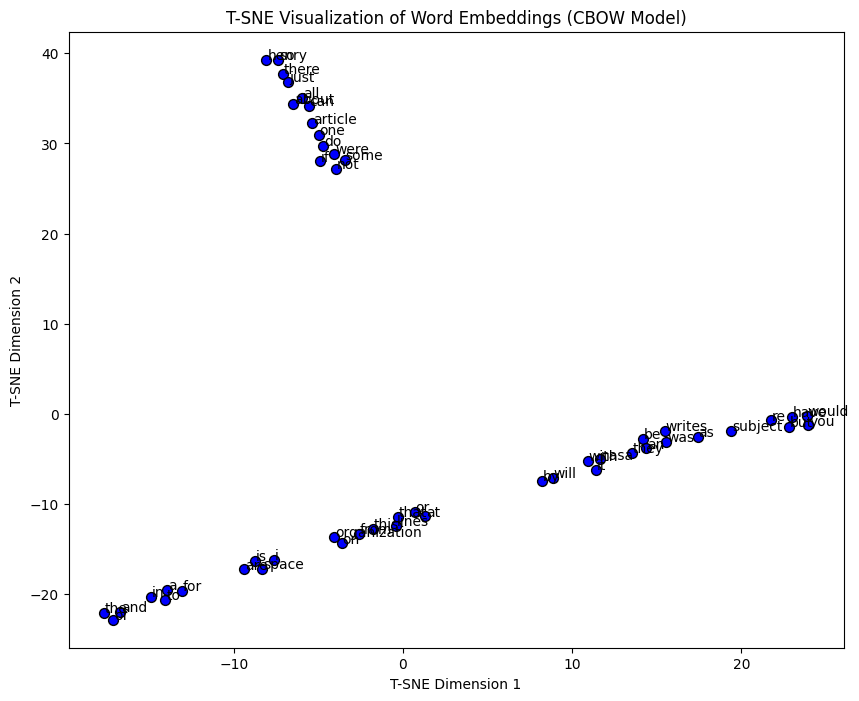

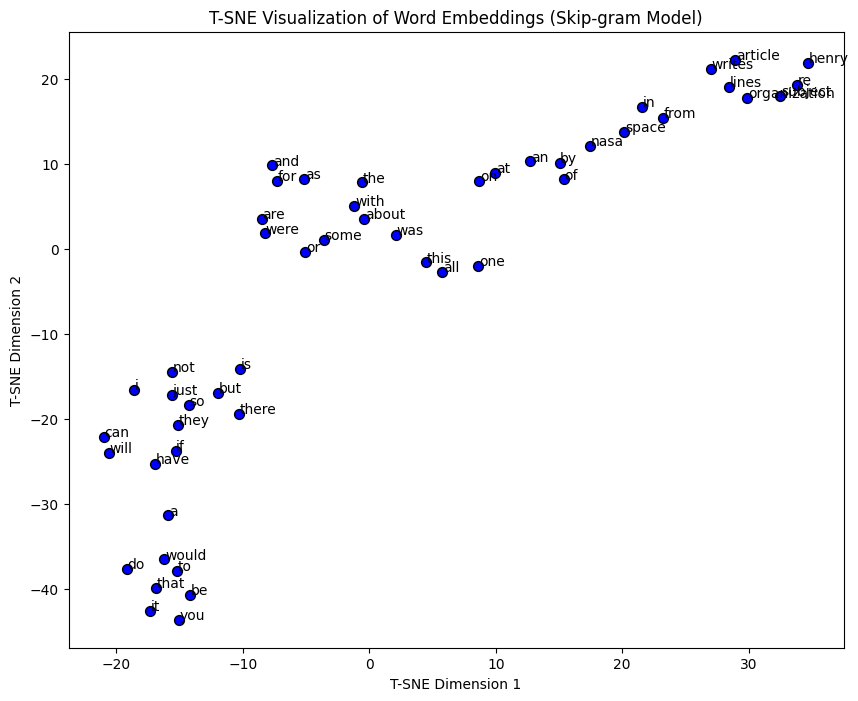

In [ ]:
# Visualize both models
plot_embeddings(cbow_model, "CBOW Model")
plot_embeddings(skipgram_model, "Skip-gram Model")

In [ ]:
# Compare most similar words for a few example words
test_words = ['space', 'nasa', 'earth']
print("\nComparing CBOW and Skip-gram similarities:")
for word in test_words:
    if word in cbow_model.wv and word in skipgram_model.wv:
        print(f"\nMost similar to '{word}':")
        print("CBOW:", cbow_model.wv.most_similar(word)[:3])
        print("Skip-gram:", skipgram_model.wv.most_similar(word)[:3])


Comparing CBOW and Skip-gram similarities:

Most similar to 'space':
CBOW: [('of', 0.999893069267273), ('are', 0.9998863339424133), ('a', 0.9998842477798462)]
Skip-gram: [('center', 0.9936127662658691), ('leech', 0.9930182695388794), ('access', 0.9920387864112854)]

Most similar to 'nasa':
CBOW: [('and', 0.9998586177825928), ('a', 0.9998584985733032), ('to', 0.9998541474342346)]
Skip-gram: [('flight', 0.9962770938873291), ('office', 0.9955864548683167), ('program', 0.9955348968505859)]

Most similar to 'earth':
CBOW: [('the', 0.9997832179069519), ('and', 0.9997761845588684), ('for', 0.9997486472129822)]
Skip-gram: [('cost', 0.9968209862709045), ('make', 0.9967890381813049), ('used', 0.9966663122177124)]
